In [1]:
# Import my own classes
import Prot_Post as Post
import OCTP_postprocess_CLASS as octp

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
Post.set_plot_settings(svg=False)

### LOAD THE SAVED DATA
For this part, we will only incude the 15 C particles.

In [3]:
runs = [r"./run_1/", r"./run_2/", r"./run_3/", r"./run_4/", r"./run_5/", r"./run_6/"]
T = 15
folders = [r"Temp_"+str(T)+"/"]
base_dir = r"MLMD/"
posts=[]

for run in runs:
    posts.append(Post.Prot_Post(base_dir+folders[0]+run))

no automatic filepath conversiona evailable use relative path
no automatic filepath conversiona evailable use relative path
no automatic filepath conversiona evailable use relative path
no automatic filepath conversiona evailable use relative path
no automatic filepath conversiona evailable use relative path
no automatic filepath conversiona evailable use relative path


### LOAD MLMD INFORMATION

In [4]:
F_index=1
hyd_n_w, hyd_n_w_r = np.zeros(len(posts)), np.zeros(len(posts))
rdf_H2OH2O = []
rdf_F_H2OH2O = []
n_F_H2OH2O = []
T = 15  # retrieve average temperature T is in Celcius, t in Kelvin

for i, post in enumerate(posts):
    # Structure, traditional
    # intra molecular
    rdf_H2OH2O.append(post.rdf_H2OH2O)
    rdf_r = post.rdf_r
    
    # Structure, Force
    # intra molecular
    rdf_F_H2OH2O.append(post.rdf_F_H2OH2O[F_index, :])
    rdf_F_r = post.rdf_F_r
    
    # coordination number
    N_hydr = post.cordination_N('H2O', 'H2O', force_rdf=True, F_idx=F_index)
    n_F_H2OH2O.append(N_hydr)
    hyd_n_w_r[i] = rdf_F_r[np.argmin(np.abs(rdf_F_r-3))+np.argmin(rdf_F_H2OH2O[i][np.argmin(np.abs(rdf_F_r-3)):np.argmin(np.abs(rdf_F_r-4.5))])]
    hyd_n_w[i] = N_hydr[np.argmin(np.abs(rdf_F_r-3))+np.argmin(rdf_F_H2OH2O[i][np.argmin(np.abs(rdf_F_r-3)):np.argmin(np.abs(rdf_F_r-4.5))])]

    

In [5]:
# Structure, traditional
# inter molecular
rdf_H2OH2O_ave, rdf_H2OH2O_err = Post.averages(np.array(rdf_H2OH2O))
rdf_F_H2OH2O_ave, rdf_F_H2OH2O_err = Post.averages(np.array(rdf_F_H2OH2O))

# Structure, Force
n_F_H2OH2O_ave, n_F_H2OH2O_err = Post.averages(np.array(n_F_H2OH2O))

# Hydration numbers
hyd_n_w_ave, hyd_n_w_err = Post.averages(hyd_n_w)
hyd_n_w_r_ave, hyd_n_w_r_err = Post.averages(hyd_n_w_r)

In [6]:
print("Structure properties")
print(f'The hydration number water is {hyd_n_w}')

Structure properties
The hydration number water is [12.62730699 12.71587109 12.68382003 12.68718959 12.6118053  12.66187219]


In [7]:
print("Structure properties")
print(f'The hydration number water is {hyd_n_w_r_ave} ± {hyd_n_w_err} at {hyd_n_w_r_ave} ± {hyd_n_w_r_err} Angstrom')

Structure properties
The hydration number water is 4.497926029418945 ± 0.03138779364356695 at 4.497926029418945 ± 0.0 Angstrom


## Import AIMD simulations at the wrong molarity (trainingsdata)

In [8]:
runs = [r"./run_1/", r"./run_2/", r"./run_3/", r"./run_4/", r"./run_5/"] #, r"./run6/"]
folders = [r"Temp_"+str(T)+"/"]
base_dir = r"AIMD/AIMD_1m_2/"
posts=[]

for run in runs:
    posts.append(Post.Prot_Post(base_dir+run))

no automatic filepath conversiona evailable use relative path
no automatic filepath conversiona evailable use relative path
no automatic filepath conversiona evailable use relative path
no automatic filepath conversiona evailable use relative path
no automatic filepath conversiona evailable use relative path


In [9]:
F_index=0
AIMD_hyd_n_w, AIMD_hyd_n_w_r = np.zeros(len(posts)), np.zeros(len(posts))
AIMD_rdf_H2OH2O = []
AIMD_rdf_F_H2OH2O = []
AIMD_n_F_H2OH2O = []
T = 15  # retrieve average temperature T is in Celcius, t in Kelvin

for i, post in enumerate(posts):
    # Structure, traditional
    AIMD_rdf_H2OH2O.append(post.rdf_H2OH2O)
    AIMD_rdf_r = post.rdf_r
    
    # Structure, Force
    AIMD_rdf_F_H2OH2O.append(post.rdf_F_H2OH2O[F_index, :])
    AIMD_rdf_F_r = post.rdf_F_r
    
    # coordination number
    AIMD_N_hydr = post.cordination_N('H2O', 'H2O', force_rdf=True, F_idx=F_index)
    AIMD_n_F_H2OH2O.append(AIMD_N_hydr)
    AIMD_hyd_n_w_r[i] = AIMD_rdf_F_r[np.argmin(np.abs(AIMD_rdf_F_r-3))+np.argmin(AIMD_rdf_F_H2OH2O[i][np.argmin(np.abs(AIMD_rdf_F_r-3)):np.argmin(np.abs(AIMD_rdf_F_r-4.5))])]
    AIMD_hyd_n_w[i] = AIMD_N_hydr[np.argmin(np.abs(AIMD_rdf_F_r-3))+np.argmin(AIMD_rdf_F_H2OH2O[i][np.argmin(np.abs(AIMD_rdf_F_r-3)):np.argmin(np.abs(AIMD_rdf_F_r-4.5))])]


In [10]:
# Structure, traditional
# intra molecular
AIMD_rdf_H2OH2O_ave, AIMD_rdf_H2OH2O_err = Post.averages(np.array(AIMD_rdf_H2OH2O))

# Structure, Force
AIMD_rdf_F_H2OH2O_ave, AIMD_rdf_F_H2OH2O_err = Post.averages(np.array(AIMD_rdf_F_H2OH2O))
AIMD_n_F_H2OH2O_ave, AIMD_n_F_H2OH2O_err = Post.averages(np.array(AIMD_n_F_H2OH2O))

# Hydration numbers
AIMD_hyd_n_w_ave, AIMD_hyd_n_w_err = Post.averages(AIMD_hyd_n_w)
AIMD_hyd_n_w_r_ave, AIMD_hyd_n_w_r_err = Post.averages(AIMD_hyd_n_w_r)

In [11]:
print("Structure properties")
print(f'The hydration number water is {AIMD_hyd_n_w}')

print("Structure properties")
print(f'The hydration number water is {AIMD_hyd_n_w_ave} ± {AIMD_hyd_n_w_err} at {AIMD_hyd_n_w_r_ave} ± {AIMD_hyd_n_w_r_err} Angstrom')

Structure properties
The hydration number water is [5.7350887  5.49063168 5.82570762 5.51840694 5.57604757]
Structure properties
The hydration number water is 5.62917650137334 ± 0.12711776832225347 at 3.5332272967041014 ± 0.023796269276334228 Angstrom


### IMPORT MD SIMULATIONS

In [12]:
folder = ['CMD/Temp_15']

for i in range(len(folder)):
    f_runs = ['run_1', 'run_2', 'run_3', 'run_4', 'run_5', 'run_6']  # All internal runs
    groups = ['wat', 'Oh', 'K']

    # Load the class
    mixture = octp.PP_OCTP(folder[i], f_runs, groups, dt=2, plotting=False)

    # Change the file names
    mixture.filenames(Diff_Onsag='diffonsag.dat',
                      T_conduc='tconductivity.dat',
                      Diff_self='diffself.dat')
    mixture.rdf()

### IMPORT DFT_MLFF force comparison

In [13]:
df = pd.read_csv('FF_accuracy_check/error_analysis/nvt13_error_assessed.csv')

### Get diffusion water MLFF

In [14]:
runs = [r"./run_1/", r"./run_2/", r"./run_3/", r"./run_4/", r"./run_5/", r"./run_6/"]
Ts_C = np.arange(15, 66, 10, dtype=np.int32)
temps = [r"Temp_"+str(T)+"/" for T in Ts_C]
base_dir = r"MLMD/"

H2O_D_ave = np.zeros(len(Ts_C))
H2O_D_err = np.zeros_like(H2O_D_ave)

In [15]:
for j, T_C in enumerate(Ts_C):
    posts = []
    for run in runs:
        posts.append(Post.Prot_Post(base_dir+r"Temp_"+str(T_C)+"/"+run, verbose=False))

    F_index=1
    D_H2O = np.zeros(len(posts))
    # Preparation for postprocessing, get EoS data

    N_salt = posts[0].N_OH
    N_water = posts[0].N_H2O

    M, L, t = Post.statepoint_Gilliam(T_C, n_koh=N_salt, n_w=N_water)
    fit_vis = Post.viscosity_Guo(T_C, M)  # for finite size correct

    for i, post in enumerate(posts):
        # Transport
        D_H2O[i] = post.diffusion("H2O", linear=False, plotting=False)
        D_H2O[i] = Post.fin_size_cor(D_H2O[i], fit_vis, t, L)

    # Transport properties
    D_H2O_ave, D_H2O_err = Post.averages(D_H2O)
    print()
    print(f'RESULTS OF: T = {T_C} C')
    print("Transport properties")
    print(f'self diffusion H2O {D_H2O_ave*1e9} ± {D_H2O_err*1e9}e-9 m^2/s')
    
    print("Transport properties detailed")
    print(f'self diffusion H2O {D_H2O*1e9} e-9 m^2/s')
    print()
    
    H2O_D_ave[j] = D_H2O_ave*1e9
    H2O_D_err[j] = D_H2O_err*1e9

1023.2156759858243

RESULTS OF: T = 15 C
Transport properties
self diffusion H2O 2.8587416903732894 ± 0.06203862981133412e-9 m^2/s
Transport properties detailed
self diffusion H2O [2.93534216 2.91946077 2.90878996 2.83991355 2.81594886 2.73299484] e-9 m^2/s

1021.1365938263432

RESULTS OF: T = 25 C
Transport properties
self diffusion H2O 3.412161037366745 ± 0.03460326206511966e-9 m^2/s
Transport properties detailed
self diffusion H2O [3.34716253 3.4341382  3.42080389 3.37102537 3.45346679 3.44636944] e-9 m^2/s

1018.084542183361

RESULTS OF: T = 35 C
Transport properties
self diffusion H2O 3.995529905509908 ± 0.028911214655112975e-9 m^2/s
Transport properties detailed
self diffusion H2O [3.94500526 4.02942319 4.01571436 3.96501914 4.03272046 3.98529703] e-9 m^2/s

1014.1004881930253

RESULTS OF: T = 45 C
Transport properties
self diffusion H2O 4.60144174421517 ± 0.05149756840689222e-9 m^2/s
Transport properties detailed
self diffusion H2O [4.65010071 4.5158431  4.58116431 4.69779282 4.

### Get Diffusion CMD

In [16]:
base_dir = 'CMD/'
groups = ['wat', 'Oh', 'K']

CMD_H2O_D_ave = np.zeros(len(Ts_C))
CMD_H2O_D_err = np.zeros_like(H2O_D_ave)
for j, T_C in enumerate(Ts_C):
    mixture2 = octp.PP_OCTP(base_dir+temps[j], runs, groups, dt=1, plotting=False)
    
    # Change the file names
    mixture2.filenames(Diff_Onsag='diffonsag.dat',
                      T_conduc='tconductivity.dat',
                      Diff_self='diffself.dat')
    
    mixture2.changefit(Minc=12, Mmax=45)
    mixture2.self_diffusivity(YH_correction=False, box_size_check=False)
    mixture2.self_diffusivity(YH_correction=True, box_size_check=False)
    mixture2.onsager_coeff(box_size_check=False)
    octp.cond_NE(mixture2, [-1, 1], YH_correction=True)
    octp.cond_Ons(mixture2, [-1, 1])
    
    CMD_H2O_D_ave[j] = mixture2.results['Self diffusivity YH_cor wat/[m^2/s]'][0]*1e9
    CMD_H2O_D_err[j] = mixture2.results['Self diffusivity YH_cor wat/[m^2/s]'][1]*1e9
    

In [17]:
fit_T = np.linspace(min(Ts_C)-2, max(Ts_C)+2, 250)
fit_econd = Post.conductivity_Gilliam(fit_T, M)

### Plot structure properties

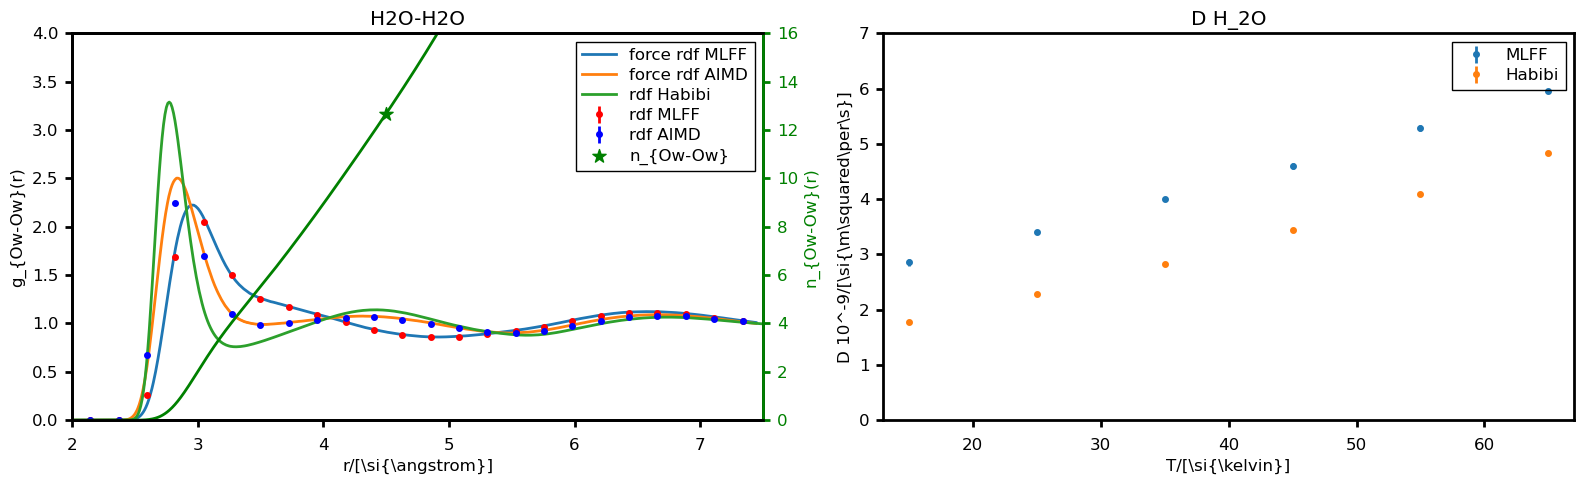

In [18]:
# Assuming you have your Post class and all necessary data loaded correctly
# Initialize subplots (adjust if you have a different setup)
fig, axs = plt.subplots(1, 2)

# PLOT PART 1 RDF Water
# MLMD
data = Post.line_with_errors(rdf_F_H2OH2O_ave, rdf_F_H2OH2O_err)
axs[0].plot(rdf_F_r, data[0], label='force rdf MLFF')
axs[0].fill_between(rdf_F_r, data[1], data[2])
axs[0].errorbar(rdf_r, rdf_H2OH2O_ave, yerr=rdf_H2OH2O_err, fmt='o', markersize='3', color='red', label='rdf MLFF')
# AIMD
data = Post.line_with_errors(AIMD_rdf_F_H2OH2O_ave, AIMD_rdf_F_H2OH2O_err)
axs[0].plot(AIMD_rdf_F_r, data[0], label='force rdf AIMD')
axs[0].fill_between(AIMD_rdf_F_r, data[1], data[2])
axs[0].errorbar(AIMD_rdf_r, AIMD_rdf_H2OH2O_ave, yerr=AIMD_rdf_H2OH2O_err, fmt='o', markersize='3', color='blue', label='rdf AIMD')
# CMD
axs[0].plot(mixture.rdf_results['r/[Angstrom]'], mixture.rdf_results['g(r) watwat'], label='rdf Habibi')
axs[0].set_xlim(2, 7.5)
axs[0].set_xlabel(r'r/[\si{\angstrom}]')
axs[0].set_ylim(0, 4)
axs[0].set_ylabel('g_{Ow-Ow}(r)')

# Then the hydration number
ax1 = axs[0].twinx()
ax1.plot(rdf_F_r[:-1], n_F_H2OH2O_ave, color='green')
ax1.scatter(hyd_n_w_r_ave, hyd_n_w_ave, color='green', label='n_{Ow-Ow}', marker='*')
ax1.set_ylim(0, 16)
ax1.set_ylabel('n_{Ow-Ow}(r)', color='green')
ax1.tick_params(axis='y', labelcolor='green', color='green')
ax1.yaxis.label.set_color('green')
ax1.spines['right'].set_color('green')

axs[0].set_title('H2O-H2O')
handles1, labels1 = axs[0].get_legend_handles_labels()
handles2, labels2 = ax1.get_legend_handles_labels()
axs[0].legend(handles1 + handles2, labels1 + labels2, loc='best')


# PLOT PART 2 Diff water
# MLMD

axs[1].errorbar(Ts_C, H2O_D_ave, yerr=H2O_D_err, fmt='o', markersize='3', label='MLFF')
axs[1].errorbar(Ts_C, CMD_H2O_D_ave, yerr=CMD_H2O_D_err, fmt='o', markersize='3', label='Habibi')
axs[1].set_title(r'D H_2O')
axs[1].legend()
axs[1].set_xlim(min(fit_T), max(fit_T))
axs[1].set_xlabel(r'T/[\si{\kelvin}]')
axs[1].set_ylim(0, 7)
axs[1].set_ylabel(r'D 10^-9/[\si{\m\squared\per\s}]')

# Adjust layout to maintain aspect ratio
fig.tight_layout()
fig.savefig('plot4')